In [8]:
import kagglehub
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

# print(os.listdir(path))
file_path = os.path.join(path, 'spam_ham_dataset.csv')
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df

In [3]:
X = df['text']
y = df['label_num']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# vectorize text → convert to numeric features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# model training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
# prediction
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
cons_mat = confusion_matrix(y_pred, y_test)
print(f"Accuracy Score: {acc}")
print(f"Classification Report:\n{c_report}")
print(f"Confusion Matrix:\n{cons_mat}")

Accuracy Score: 0.9256038647342996
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       735
           1       1.00      0.74      0.85       300

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035

Confusion Matrix:
[[735  77]
 [  0 223]]


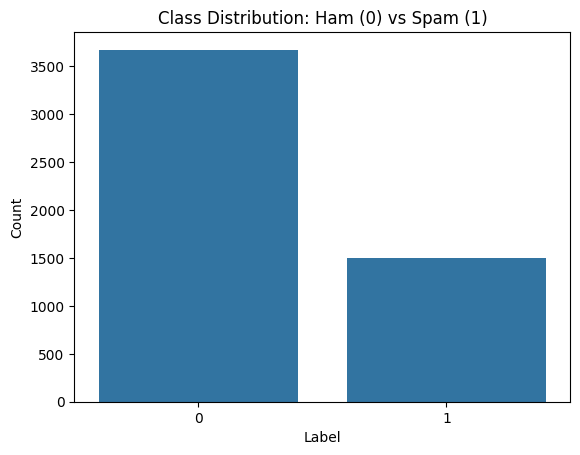

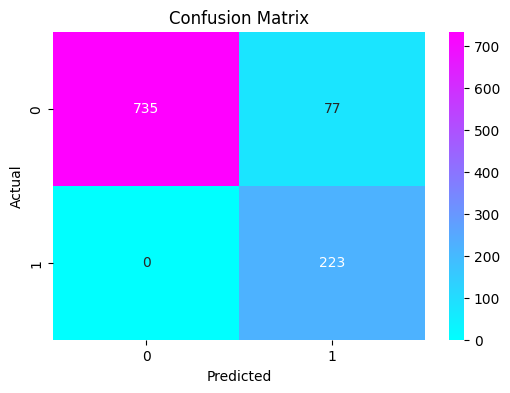

In [10]:
# visualization
# 1. Class Distribution
sns.countplot(x=y)
plt.title("Class Distribution: Ham (0) vs Spam (1)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# 2. Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cons_mat, annot=True, fmt='d', cmap='cool')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# prediction of custom emails
user_msg = ["Hello!! You've won a lottery.", "Send the otp received on your email to win prize upto Rs 1000k.",
            "We are hackers, send your credit card pin", "Hello!! You've won a car, send Rs 100000 to win a prize of Rs 1", "Hi How are you?", "Hello How are you?"]


user_msg_vect = vectorizer.transform(user_msg)

cust_pred = model.predict(user_msg_vect)
for i in cust_pred:
    if i == 0:
        print("Email Not Spam")
    elif i == 1:
        print("Email is Spam")

Email is Spam
Email Not Spam
Email Not Spam
Email is Spam
Email Not Spam
Email is Spam
